In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

u = np.ones((25, 100))
alpha = 0.25
N = 1000

for i in range(N):
    u[1:-1, 1:-1] += alpha * (u[:-2, 1:-1] + u[2:, 1:-1] + u[1:-1, :-2]+u[1:-1, 2:] -4 * u[1:-1, 1:-1])

In [33]:
def constrast(file, k):
    orig_im = imageio.imread(file) 
    print(orig_im.shape, orig_im.dtype, orig_im.min(), orig_im.max())
    grey_im =  orig_im.astype(float).sum(2) / (255 * 3)
    orig_grey_im = orig_im.astype(float).sum(2) / (255 * 3)

    alpha = .25                     # dt / dx**2
    for i in range(10):
        laplace = (grey_im[0:-2, 1:-1] +
            grey_im[2:, 1:-1] +
            grey_im[1:-1, 0:-2] +
            grey_im[1:-1, 2:] -
            4 * grey_im[1:-1, 1:-1])
        const = k * (orig_grey_im[0:-2, 1:-1] +
            orig_grey_im[2:, 1:-1] +
            orig_grey_im[1:-1, 0:-2] +
            orig_grey_im[1:-1, 2:] -
           4 * orig_grey_im[1:-1, 1:-1])
        grey_im[1:-1, 1:-1] += (alpha * laplace)
        grey_im[1:-1, 1:-1] -= (alpha * const)
        grey_im[:, 0] = grey_im[:, 1]      # Neumann randbetingelse
        grey_im[:, -1] = grey_im[:, -2]    #
        grey_im[0, :] = grey_im[1, :]      #
        grey_im[-1, :] = grey_im[-2 , :]   #
        
    for i in range(orig_im.shape[0]):
        for j in range(orig_im.shape[1]):
            if grey_im[i][j] > 1:
                grey_im[i][j] = 1
            elif grey_im[i][j] < 0:
                grey_im[i][j] = 0

    plt.imshow(grey_im, plt.cm.gray)
    plt.show()
    plt.imshow(orig_grey_im, plt.cm.gray)

(732, 1214, 3) uint8 0 255


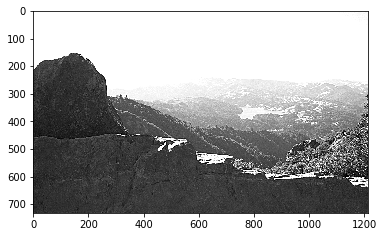

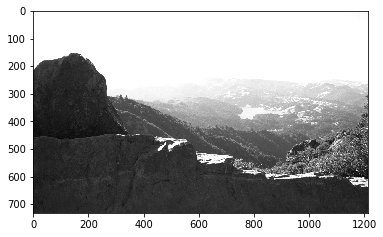

In [34]:
filepath = "..\hdr-bilder\MtTamWest\MtTamWest_00064.png"
constant = 2.3

constrast(filepath, constant)